In [54]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd 
import numpy as np 



In [56]:

from mlxtend.plotting import plot_decision_regions

In [57]:
df=pd.DataFrame()


In [58]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['lable']=[1,1,0,1,0,1,0,1,0,0]

In [59]:
df

,x1,x2,lable
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

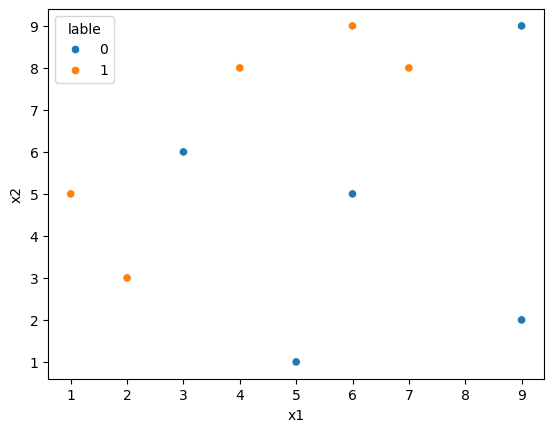

In [60]:
import seaborn as sns
sns.scatterplot(data=df,x='x1',y='x2',hue='lable')

In [61]:
df['weights']=1/df.shape[0]

In [62]:
df

,x1,x2,lable,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt1=DecisionTreeClassifier(max_depth=1)

In [65]:
X=df.iloc[:,0:2]
y=df['lable']

In [66]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

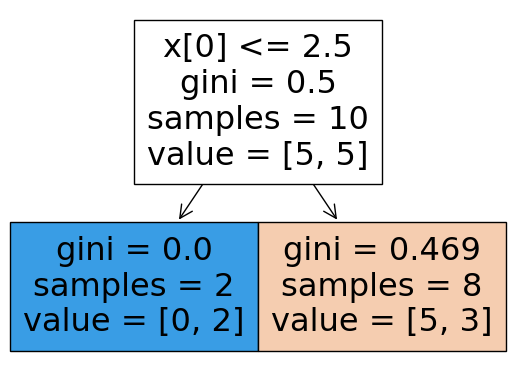

In [67]:
from sklearn.tree import plot_tree
plot_tree(dt1,filled=True)

/home/rohan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

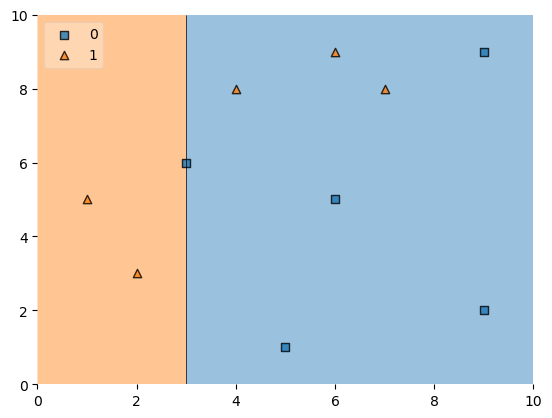

In [68]:
plot_decision_regions(X.values,y.values,clf=dt1,legend=2)

In [69]:
df['y_pred']=dt1.predict(X)

In [70]:
DF

NameError: name 'DF' is not defined

In [ ]:
df

,x1,x2,lable,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [71]:
def calculate_modle_weight(eroor):
    return 0.5*np.log((1-eroor)/eroor)

In [72]:
alpha1=calculate_modle_weight(0.3)
alpha1

0.42364893019360184

In [73]:
## update weights
def update_row_weight(row,alpha):
    if row['lable']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [74]:
df['updated_weights']=df.apply(update_row_weight,axis=1,args=(alpha1,))

In [75]:
df

,x1,x2,lable,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,6,5,0,0.1,0,0.065465
7,7,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [76]:
df['updated_weights'].sum()

0.9165151389911682

In [77]:
df['normalize']=df['updated_weights']/df['updated_weights'].sum()


In [78]:
df

,x1,x2,lable,weights,y_pred,updated_weights,normalize
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [79]:
df['normalize'].sum()

0.9999999999999999

In [80]:
df['cumsum_upper']=np.cumsum(df['normalize'])

In [81]:
df['cumsum_lower']=df['cumsum_upper']-df['normalize']

In [82]:
df[['x1','x2','lable','weights','y_pred','updated_weights','normalize','cumsum_lower','cumsum_upper']]

,x1,x2,lable,weights,y_pred,updated_weights,normalize,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.071429,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.071429,0.142857
2,3,6,0,0.1,0,0.065465,0.071429,0.142857,0.214286
3,4,8,1,0.1,0,0.152753,0.166667,0.214286,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.380952,0.452381
5,6,9,1,0.1,0,0.152753,0.166667,0.452381,0.619048
6,6,5,0,0.1,0,0.065465,0.071429,0.619048,0.690476
7,7,8,1,0.1,0,0.152753,0.166667,0.690476,0.857143
8,9,9,0,0.1,0,0.065465,0.071429,0.857143,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,0.928571,1.000000


In [83]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a>row['cumsum_lower']:
                indices.append(index)
                
    return indices

In [84]:
index_values=create_new_dataset(df)
index_values

[3, 7, 8, 9, 1, 8, 2, 5, 5, 3]

In [85]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [86]:
second_df

,x1,x2,lable,weights
3,4,8,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1


In [87]:
dt2=DecisionTreeClassifier(max_depth=1)

In [88]:
X=second_df.iloc[:,0:2].values
y=second_df['lable'].values

In [89]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

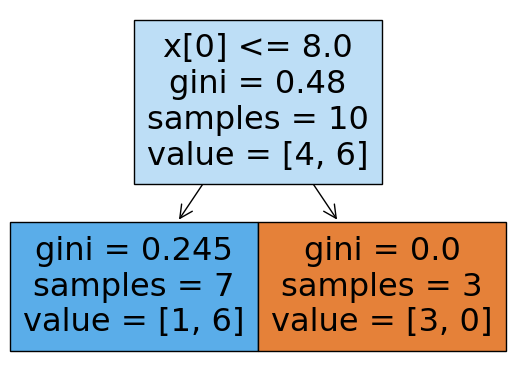

In [90]:
plot_tree(dt2,filled=True)



<Axes: >

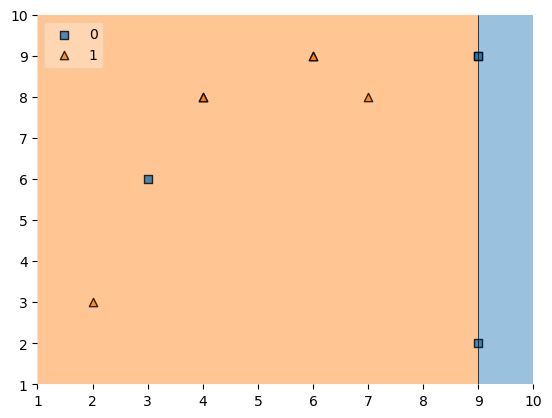

In [91]:

plot_decision_regions(X,y,clf=dt2,legend=2)

In [92]:
second_df['y_pred']=dt2.predict(X)

In [93]:
second_df

,x1,x2,lable,weights,y_pred
3,4,8,1,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,0
9,9,2,0,0.1,0
1,2,3,1,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1


In [94]:
aplha2=calculate_modle_weight(0.1)  

In [95]:
aplha2

1.0986122886681098

In [96]:
def update_row_weight(row,alpha):
    if row['lable']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [97]:
second_df['updated_weights']=second_df.apply(update_row_weight,axis=1,args=(aplha2,))

In [98]:
second_df['normalize']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [99]:
second_df['cumsum_upper']=np.cumsum(second_df['normalize'])

In [100]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalize']

In [102]:
second_df['x1','x2','lable','weights','y_pred','updated_weights','normalize','cumsum_lower','cumsum_upper']

KeyError: ('x1', 'x2', 'lable', 'weights', 'y_pred', 'updated_weights', 'normalize', 'cumsum_lower', 'cumsum_upper')